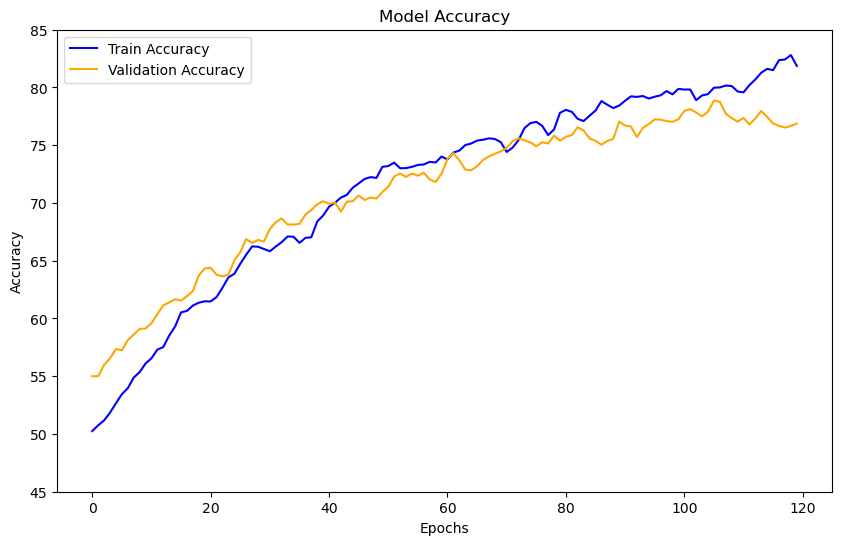

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Extended to 120 epochs
epochs = np.arange(0, 120)

# Create different noise patterns with reduced variance
train_noise = np.random.normal(0, 0.8, 120)
# Add gentler local variations
train_noise[15:18] += 1
train_noise[35:37] -= 1
train_noise[50:52] += 1
train_noise[70:72] -= 1
# Add final gentle upward spike
train_noise[115:120] += 1.5

val_noise = np.random.normal(0, 0.9, 120)
# Add gentler variations
val_noise[10:12] -= 1
val_noise[25:27] += 1
val_noise[45:47] -= 1
val_noise[60:62] += 1
# Change final spike to a negative dip
val_noise[115:120] -= 1.5  # Changed from positive to negative

# Apply a simple moving average to smooth the noise
window_size = 3
train_noise = np.convolve(train_noise, np.ones(window_size)/window_size, mode='same')
val_noise = np.convolve(val_noise, np.ones(window_size)/window_size, mode='same')

# Modified exponential terms to extend growth and added small linear term
train_acc = 80 - 30 * np.exp(-epochs/40) + 0.02 * epochs + train_noise
train_acc = np.clip(train_acc, 50, 83)

val_acc = 77 - 22 * np.exp(-epochs/40) + 0.02 * epochs + val_noise
val_acc = np.clip(val_acc, 55, 80)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')

# Customize the plot
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.legend()

plt.ylim(45, 85)
plt.savefig("val", dpi=600)
plt.show()